In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

def load_data(ticker="^GSPC", start="2005-01-01", end="2023-12-31"):
    data = yf.download(ticker, start=start, end=end)[["Close"]]
    data.rename(columns={"Close": "price"}, inplace=True)
    data["return"] = data["price"].pct_change()
    return data

def prepare_data(data, lags=5):
    cols = []
    for lag in range(1, lags + 1):
        col = f"lag_{lag}"
        data[col] = data["return"].shift(lag)
        cols.append(col)
    data.dropna(inplace=True)
    return data, cols

def run_strategy(data, model_type="linear", lags=5):
    data, cols = prepare_data(data.copy(), lags)

    if model_type == "linear":
        model = LinearRegression()
        y = data["return"]
    elif model_type == "logistic":
        model = LogisticRegression(C=1e6, max_iter=1000)
        y = np.sign(data["return"])
    else:
        raise ValueError("model_type must be 'linear' or 'logistic'")

    X = data[cols]
    model.fit(X, y)
    
    predictions = model.predict(X)

    if model_type == "linear":
        hit_ratio = np.mean(np.sign(predictions) == np.sign(y))
    else:
        hit_ratio = model.score(X, y)  # classification accuracy

    return hit_ratio

def analyze_periods(data, model_type="linear"):
    periods = [
        ("2008 Crisis", "Before", "2005-01-01", "2006-12-31"),
        ("2008 Crisis", "During", "2007-01-01", "2009-06-30"),
        ("2008 Crisis", "After", "2009-07-01", "2011-12-31"),
        ("2020 Crisis", "Before", "2017-01-01", "2019-12-31"),
        ("2020 Crisis", "During", "2020-01-01", "2020-06-30"),
        ("2020 Crisis", "After", "2020-07-01", "2022-12-31")
    ]

    results = []

    for crisis, period, start, end in periods:
        period_data = data.loc[start:end].copy()
        if len(period_data) < 100:
            print(f"Skipping {period} ({crisis}): Not enough data.")
            continue
        try:
            accuracy = run_strategy(period_data, model_type=model_type)
            results.append({
                "Crisis": crisis,
                "Period": period,
                "Model": model_type.title(),
                "Accuracy": round(accuracy, 4)
            })
        except Exception as e:
            print(f"Error during {period} of {crisis}: {e}")

    return pd.DataFrame(results)

def plot_results(results_df):
    pivot = results_df.pivot(index=["Crisis", "Period"], columns="Model", values="Accuracy")
    pivot.plot(kind="bar", figsize=(10, 6))
    plt.title("Model Accuracy Across Crisis Periods")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


         Crisis  Period     Model  Accuracy
0   2008 Crisis  Before    Linear    0.5594
1   2008 Crisis  During    Linear    0.5457
2   2008 Crisis   After    Linear    0.5439
3   2020 Crisis  Before    Linear    0.5501
4   2020 Crisis  During    Linear    0.5917
5   2020 Crisis   After    Linear    0.5144
6   2008 Crisis  Before  Logistic    0.5594
7   2008 Crisis  During  Logistic    0.5425
8   2008 Crisis   After  Logistic    0.5630
9   2020 Crisis  Before  Logistic    0.5621
10  2020 Crisis  During  Logistic    0.6083
11  2020 Crisis   After  Logistic    0.5160


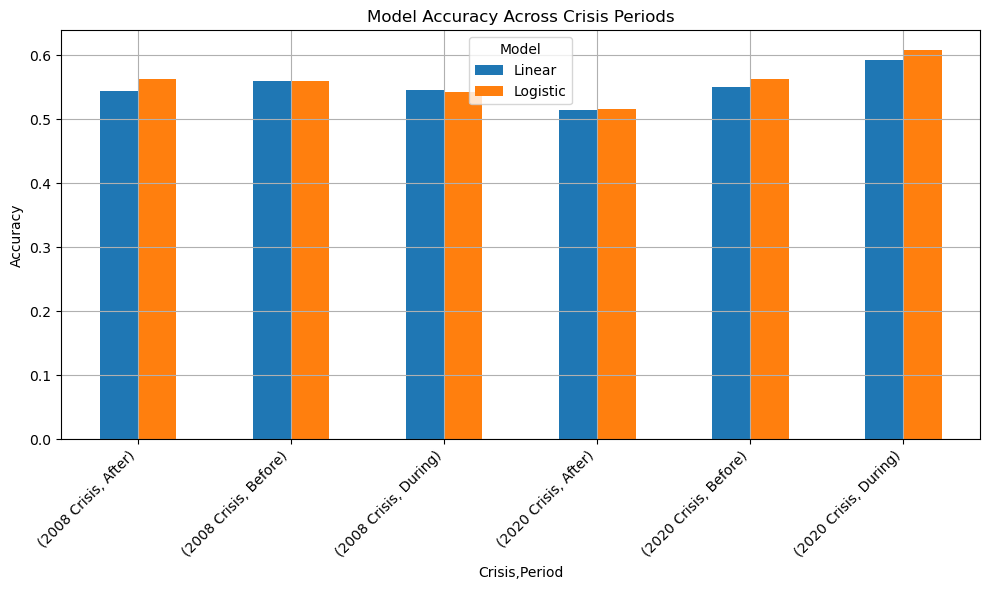

In [2]:
data = load_data("^GSPC")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)


[*********************100%***********************]  1 of 1 completed


         Crisis  Period     Model  Accuracy
0   2008 Crisis  Before    Linear    0.5810
1   2008 Crisis  During    Linear    0.5367
2   2008 Crisis   After    Linear    0.4890
3   2020 Crisis  Before    Linear    0.5300
4   2020 Crisis  During    Linear    0.5333
5   2020 Crisis   After    Linear    0.5582
6   2008 Crisis  Before  Logistic    0.5988
7   2008 Crisis  During  Logistic    0.5351
8   2008 Crisis   After  Logistic    0.5283
9   2020 Crisis  Before  Logistic    0.5381
10  2020 Crisis  During  Logistic    0.5417
11  2020 Crisis   After  Logistic    0.5629


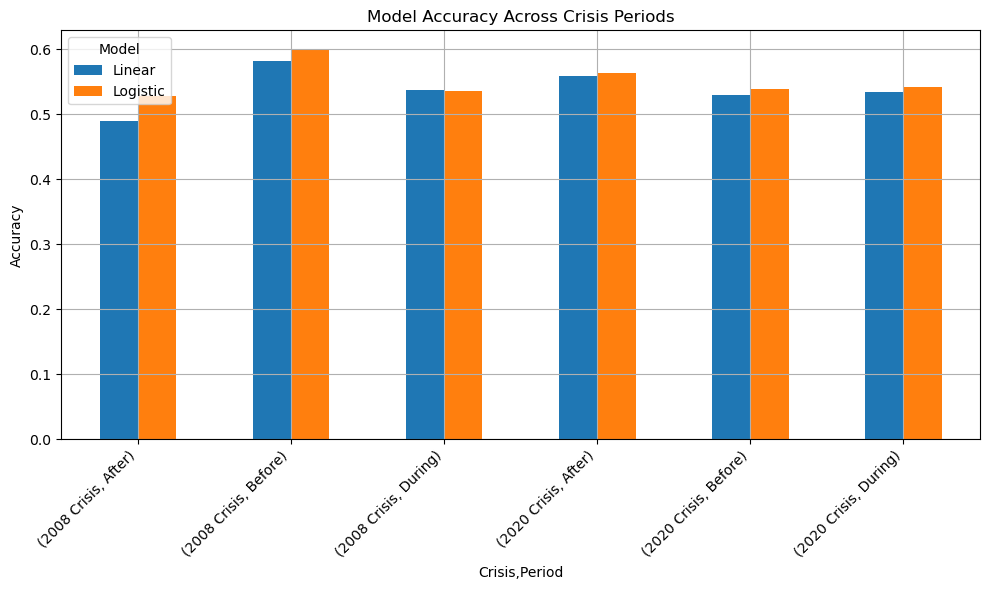

In [3]:
data = load_data("^GDAXI")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)

[*********************100%***********************]  1 of 1 completed


         Crisis  Period     Model  Accuracy
0   2008 Crisis  Before    Linear    0.5402
1   2008 Crisis  During    Linear    0.5194
2   2008 Crisis   After    Linear    0.5248
3   2020 Crisis  Before    Linear    0.5342
4   2020 Crisis  During    Linear    0.5294
5   2020 Crisis   After    Linear    0.6093
6   2008 Crisis  Before  Logistic    0.5522
7   2008 Crisis  During  Logistic    0.5178
8   2008 Crisis   After  Logistic    0.5440
9   2020 Crisis  Before  Logistic    0.5423
10  2020 Crisis  During  Logistic    0.6303
11  2020 Crisis   After  Logistic    0.6334


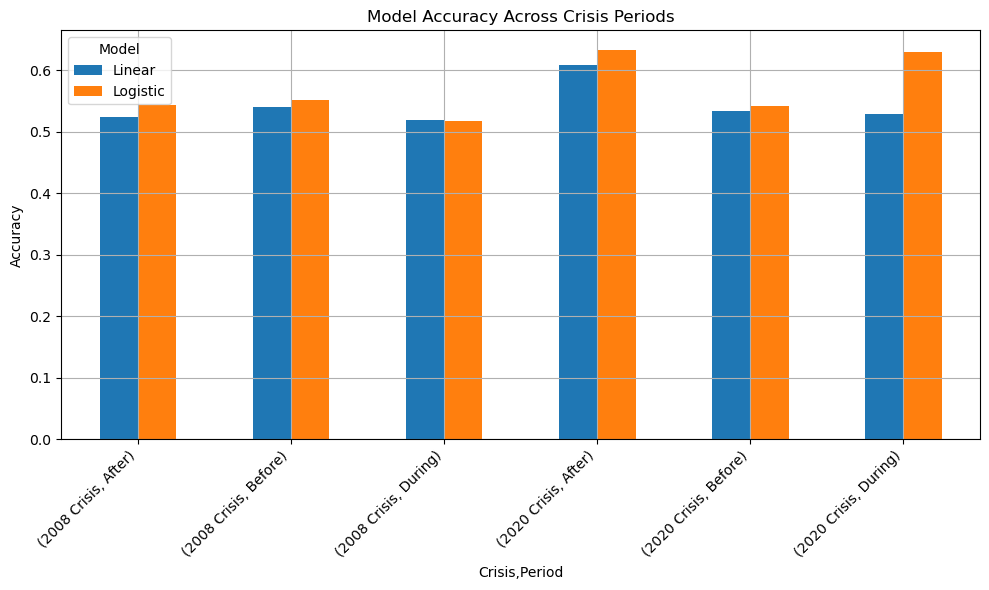

In [4]:
data = load_data("XU100.IS")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)

[*********************100%***********************]  1 of 1 completed


         Crisis  Period     Model  Accuracy
0   2008 Crisis  Before    Linear    0.5460
1   2008 Crisis  During    Linear    0.5385
2   2008 Crisis   After    Linear    0.4894
3   2020 Crisis  Before    Linear    0.5565
4   2020 Crisis  During    Linear    0.5508
5   2020 Crisis   After    Linear    0.5397
6   2008 Crisis  Before  Logistic    0.5624
7   2008 Crisis  During  Logistic    0.5614
8   2008 Crisis   After  Logistic    0.5317
9   2020 Crisis  Before  Logistic    0.5565
10  2020 Crisis  During  Logistic    0.5847
11  2020 Crisis   After  Logistic    0.5300


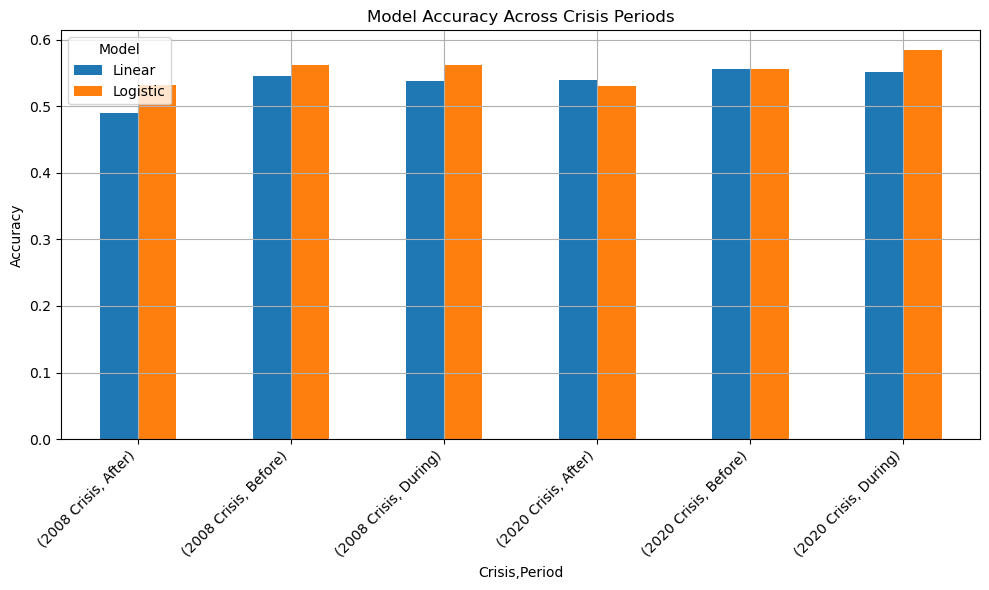

In [5]:
data = load_data("^BVSP")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)

[*********************100%***********************]  1 of 1 completed


         Crisis  Period     Model  Accuracy
0   2008 Crisis  Before    Linear    0.5624
1   2008 Crisis  During    Linear    0.5265
2   2008 Crisis   After    Linear    0.5301
3   2020 Crisis  Before    Linear    0.5479
4   2020 Crisis  During    Linear    0.6207
5   2020 Crisis   After    Linear    0.5566
6   2008 Crisis  Before  Logistic    0.5951
7   2008 Crisis  During  Logistic    0.5579
8   2008 Crisis   After  Logistic    0.5024
9   2020 Crisis  Before  Logistic    0.5466
10  2020 Crisis  During  Logistic    0.5948
11  2020 Crisis   After  Logistic    0.5405


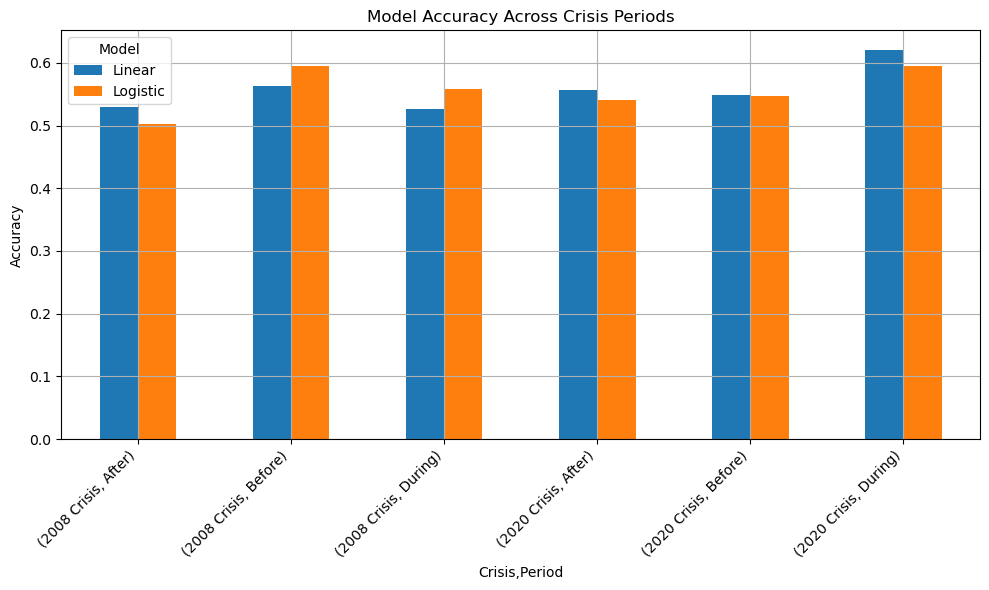

In [6]:
data = load_data("^BSESN")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)

[*********************100%***********************]  1 of 1 completed


Skipping Before (2008 Crisis): Not enough data.
Skipping During (2008 Crisis): Not enough data.
Skipping After (2008 Crisis): Not enough data.
Skipping Before (2008 Crisis): Not enough data.
Skipping During (2008 Crisis): Not enough data.
Skipping After (2008 Crisis): Not enough data.
        Crisis  Period     Model  Accuracy
0  2020 Crisis  Before    Linear    0.5007
1  2020 Crisis  During    Linear    0.6000
2  2020 Crisis   After    Linear    0.5431
3  2020 Crisis  Before  Logistic    0.5007
4  2020 Crisis  During  Logistic    0.6333
5  2020 Crisis   After  Logistic    0.5415


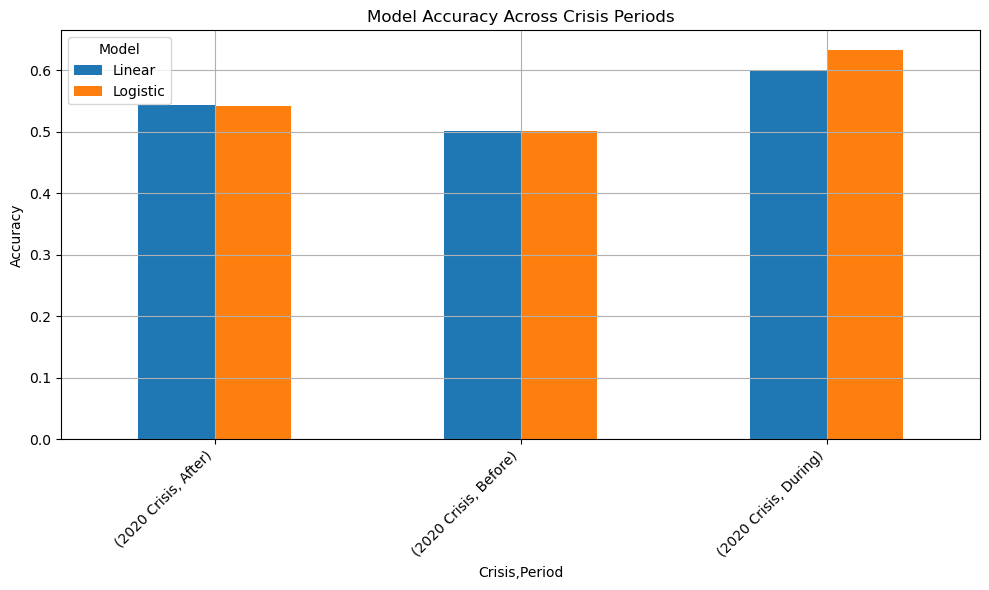

In [7]:
data = load_data("NGE")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)

[*********************100%***********************]  1 of 1 completed


Skipping Before (2008 Crisis): Not enough data.
Skipping During (2008 Crisis): Not enough data.
Skipping After (2008 Crisis): Not enough data.
Skipping Before (2008 Crisis): Not enough data.
Skipping During (2008 Crisis): Not enough data.
Skipping After (2008 Crisis): Not enough data.
        Crisis  Period     Model  Accuracy
0  2020 Crisis  Before    Linear    0.5274
1  2020 Crisis  During    Linear    0.5583
2  2020 Crisis   After    Linear    0.5192
3  2020 Crisis  Before  Logistic    0.5394
4  2020 Crisis  During  Logistic    0.6417
5  2020 Crisis   After  Logistic    0.5351


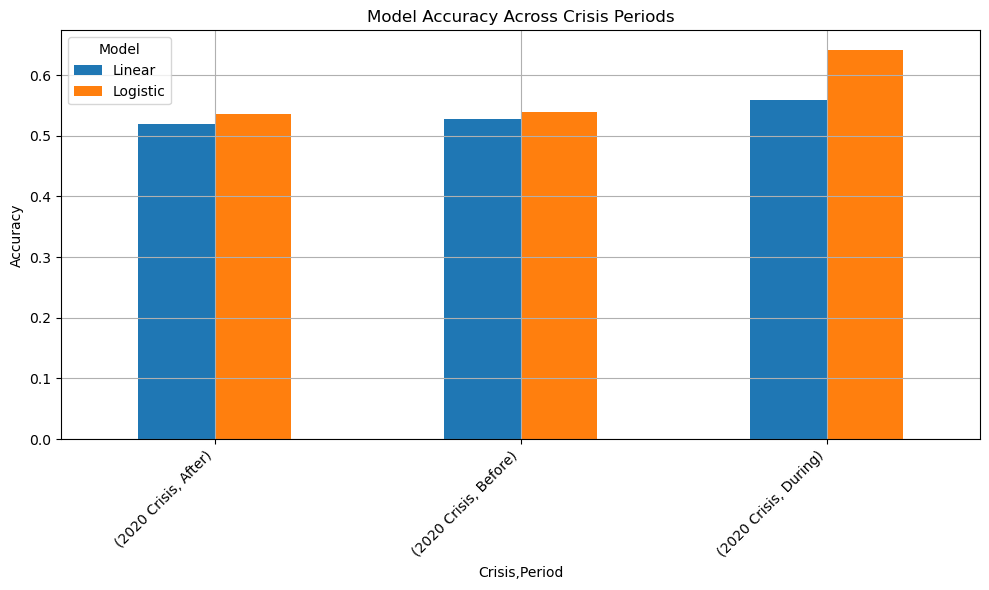

In [8]:
data = load_data("PAK")

# Analyze both models
linear_results = analyze_periods(data, model_type="linear")
logistic_results = analyze_periods(data, model_type="logistic")

# Combine results
all_results = pd.concat([linear_results, logistic_results], ignore_index=True)

# Show results
print(all_results)

# Plot
plot_results(all_results)